In [2]:
import pandas as pd
file_path = 'global-hunger-index.csv'
df = pd.read_csv(file_path)
df.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      471 non-null    object 
 1   Code                        471 non-null    object 
 2   Year                        471 non-null    int64  
 3   Global Hunger Index (2021)  471 non-null    float64
 4   411773-annotations          12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


Entity                          0
Code                            0
Year                            0
Global Hunger Index (2021)      0
411773-annotations            459
dtype: int64

In [6]:
df = df.dropna()

<Axes: >

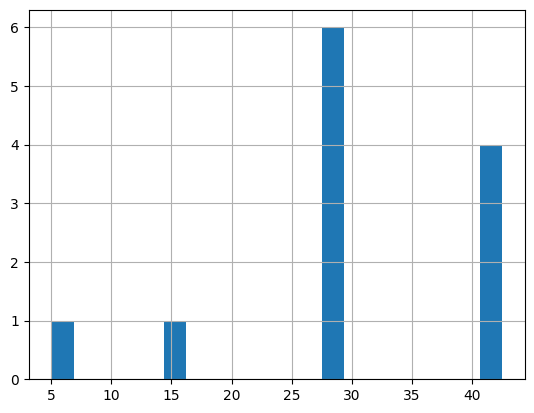

In [12]:
df['Entity'].nunique()

df['GHI_Score'] = pd.to_numeric(df['Global Hunger Index (2021)'], errors='coerce')
df['GHI_Score'].hist(bins=20)

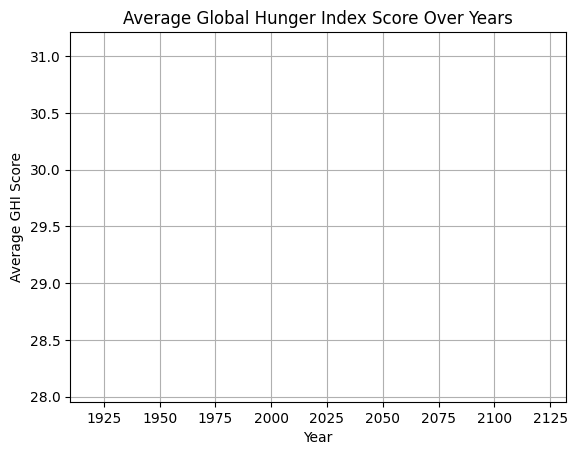

In [28]:
import matplotlib.pyplot as plt

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.groupby('Year')['GHI_Score'].mean().plot(title='Average Global Hunger Index Score Over Years')

plt.xlabel('Year')
plt.ylabel('Average GHI Score')
plt.grid(True)
plt.show()

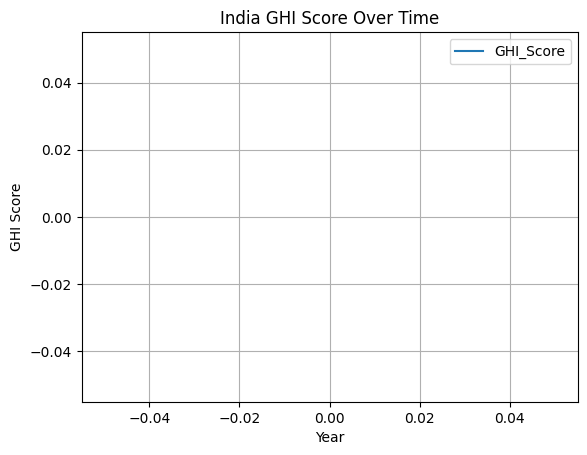

In [27]:
import matplotlib.pyplot as plt

india_data = df[df['Entity'] == 'India']

india_data.plot(x='Year', y='GHI_Score', title='India GHI Score Over Time')
plt.xlabel('Year')
plt.ylabel('GHI Score')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Average GHI Score by Region'}, xlabel='Entity'>

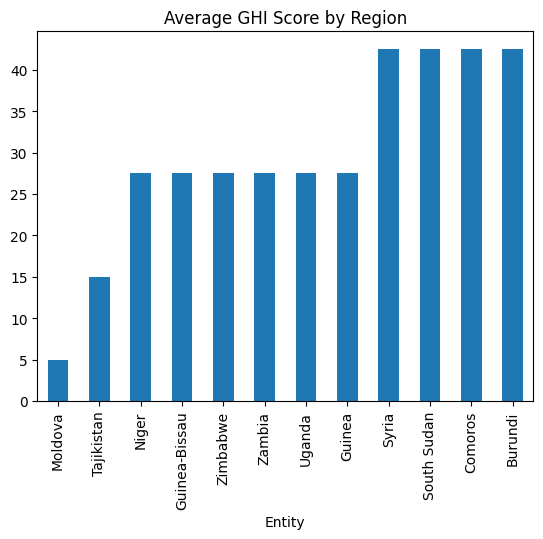

In [23]:
df.groupby('Entity')['GHI_Score'].mean().sort_values().plot(kind='bar', title='Average GHI Score by Region')

Text(0.5, 1.0, 'Correlation Matrix')

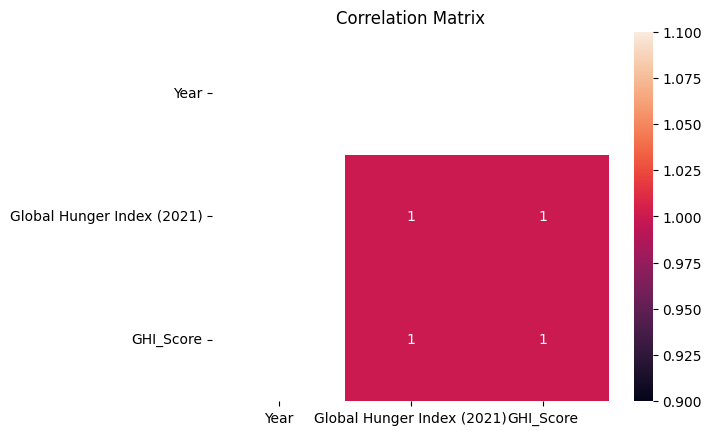

In [24]:
df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')

In [ ]:
df.to_csv('/mnt/data/processed_ghi.csv', index=False)